## 1.0 Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans # K-Means Clustering
from sklearn.cluster import AgglomerativeClustering # Hierarachical Agglomerative Clustering
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler # use standardizer instead
from scipy.optimize import linear_sum_assignment

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 2.0 Import Prepared Dataset

In [2]:
file_path = "training_data_v2.xlsx"
df = pd.read_excel(file_path)
print(df.head())
ground_truth = df["Category"].values

   Index  Category     dim_1     dim_2     dim_3     dim_4     dim_5  \
0      0         0 -0.882278 -0.647234  0.050173 -0.448188 -0.175582   
1      1         0 -0.702665 -0.462591  0.162085 -0.029182 -0.280842   
2      2         0 -0.327257 -0.397209  0.035037 -0.064671 -0.435734   
3      3         0 -0.793734 -0.470964 -0.278644 -0.292047 -0.565868   
4      4         0 -0.272840 -0.556684  0.001737 -0.229906 -0.495732   

      dim_6     dim_7     dim_8  ...   dim_759   dim_760   dim_761   dim_762  \
0  0.125284 -0.335781 -0.396106  ...  0.568470 -0.326577  0.026089 -0.407658   
1  0.047459  0.109864 -0.540210  ...  0.249440 -0.422917  0.033820 -0.226271   
2  0.535525  0.134867 -0.213102  ...  0.710835 -0.191510 -0.068998 -0.262279   
3  0.546791  0.604674 -0.069190  ...  0.387789 -0.596448 -0.291108 -0.320205   
4  0.176596 -0.141926 -0.352247  ...  0.660122 -0.534026  0.347033 -0.279629   

    dim_763   dim_764   dim_765   dim_766   dim_767   dim_768  
0 -0.162295 -0.121949 

# Part 1: K-means Clustering

## 3.0 Clustering

In [14]:
# standardize the data
X = df.drop(columns=['Index', 'Category'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
k = 4 # known cluster count
kmeans = KMeans(n_clusters=k, random_state=0) # initialize K_means_cluster with k and random_state
kmeans.fit(X_scaled) # perform clustering

D:\anaconda3\envs\huggingman\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

## 4.0 Result Evaluation

### 4.1 Evaluation by sight

In [16]:
cluster_labels = kmeans.labels_

In [17]:
cluster_labels # display clsutered label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0,
       3, 3, 3, 1, 0, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [18]:
ground_truth # display ground truth

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [19]:
def category_modification_by_sight(cluster_labels, sight_separation): # weak customized function for visualization
    new_cluster_labels = cluster_labels
    for i in range(len(new_cluster_labels)):
        new_cluster_labels[i] = sight_separation[new_cluster_labels[i]]
    return new_cluster_labels

In [20]:
def custom_accuracy_scores(new_cluster_labels, ground_truth): # customized accuracy calculation
    sum = 0
    for it in range(200):
        if (new_cluster_labels[it] == ground_truth[it]):
            sum+=1
    accuracy = sum / 200
    return accuracy

In [21]:
new_cluster_labels = category_modification_by_sight(cluster_labels, [3, 2, 0, 1])
new_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3,
       1, 1, 1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 3])

In [22]:
ground_truth

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [23]:
accuracy = custom_accuracy_scores(new_cluster_labels, ground_truth)
print(accuracy)

0.71


In [24]:
cluster_centers = kmeans.cluster_centers_ # get cluster centroids
print(cluster_centers.shape) # (k, data_points)

(4, 768)


### 4.2 Evaluation by scipy module

In [31]:
contingency_matrix = pd.crosstab(df['Category'], cluster_labels) # Hungarian method to find one-to-one mapping based on contingency_matrix
row_idx, col_idx = linear_sum_assignment(-contingency_matrix.values)

mapped_labels = np.zeros_like(cluster_labels)
for i, col in enumerate(col_idx):
    mapped_labels[cluster_labels == col] = row_idx[i]

In [32]:
accuracy = accuracy_score(df['Category'], mapped_labels)
print("Accuracy:", accuracy) # final accuracy equivalaent to "category_modification_by_sight"

Accuracy: 0.71


### 4.3 K-means Clustering Specific Inertia

In [33]:
print("Inertia:", kmeans.inertia_) # inertia is too high, indicates not well-defined clusters

Inertia: 119651.85013557624


### 4.4 Silhouette Score

In [34]:
ground_truth_2d = ground_truth.reshape(-1, 1)  # Reshape ground_truth to have one feature per sample
silhouette_score_value = silhouette_score(ground_truth_2d, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.2900141806774307


### 4.5 Davies Bouldin Score

In [35]:
davies_bouldin_score_value = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_score_value)

Davies-Bouldin Index: 2.612860406970152


### 4.6 Adjusted Rand Index (ARI)

In [36]:
ari = adjusted_rand_score(ground_truth, cluster_labels)
print("ARI:", ari)

ARI: 0.48541501649666136


### 4.7 Normalized Mutual Information (NMI)

In [37]:
nmi = normalized_mutual_info_score(ground_truth, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi}")

Normalized Mutual Information (NMI): 0.5263556756551566


### 4.8 Cluster Purity

In [38]:
def cluster_purity(ground_truth, predicted_labels):
    cm = confusion_matrix(ground_truth, predicted_labels)
    purity = np.sum(np.max(cm, axis=0)) / np.sum(cm)
    return purity

In [39]:
purity = cluster_purity(ground_truth, cluster_labels)
print(f"Cluster Purity: {purity:.2f}")

Cluster Purity: 0.71


### 5.0 Silhouette Plot

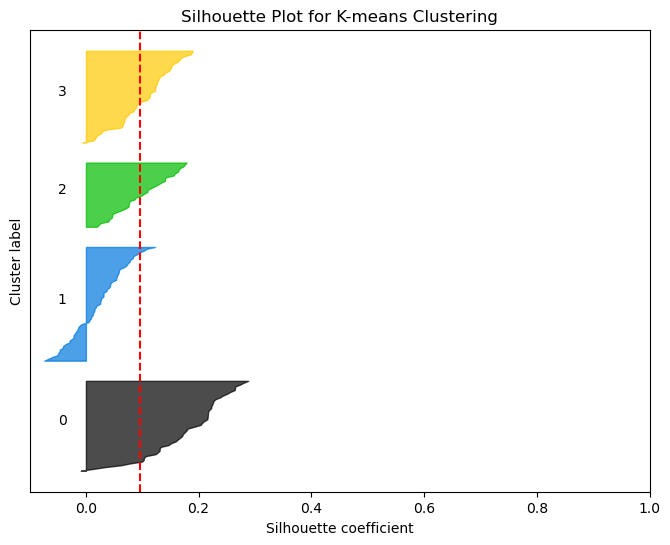

In [40]:
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot for K-means Clustering')
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

### 6.0 Principal Component Analysis (PCA)

In [65]:
X = df.drop(columns=['Index', 'Category'])
pca = PCA(n_components=10)  # Reduce to 2 principal components
data_pca = pca.fit_transform(X) # PCA

k = 4 # known cluster count
kmeans = KMeans(n_clusters=k, random_state=0) # initialize K_means_cluster with k and random_state
kmeans.fit(data_pca) # perform clustering

cluster_labels = kmeans.labels_

contingency_matrix = pd.crosstab(df['Category'], cluster_labels)
row_idx, col_idx = linear_sum_assignment(-contingency_matrix.values)

mapped_labels = np.zeros_like(cluster_labels)
for i, col in enumerate(col_idx):
    mapped_labels[cluster_labels == col] = row_idx[i]
    
accuracy = accuracy_score(df['Category'], mapped_labels)
print("Accuracy:", accuracy) # final accuracy equivalaent to "category_modification_by_sight"

print("Inertia:", kmeans.inertia_) # inertia is too high, indicates not well-defined clusters

ground_truth_2d = ground_truth.reshape(-1, 1)  # Reshape ground_truth to have one feature per sample
silhouette_score_value = silhouette_score(ground_truth_2d, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

davies_bouldin_score_value = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_score_value)

ari = adjusted_rand_score(ground_truth, cluster_labels)
print("ARI:", ari)

nmi = normalized_mutual_info_score(ground_truth, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi}")

purity = cluster_purity(ground_truth, cluster_labels)
print(f"Cluster Purity: {purity:.2f}")

D:\anaconda3\envs\huggingman\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy: 0.73
Inertia: 3696.3744049433944
Silhouette Score: 0.32779087393429057
Davies-Bouldin Index: 2.73175296768834
ARI: 0.5069346842796405
Normalized Mutual Information (NMI): 0.548161712517762
Cluster Purity: 0.73


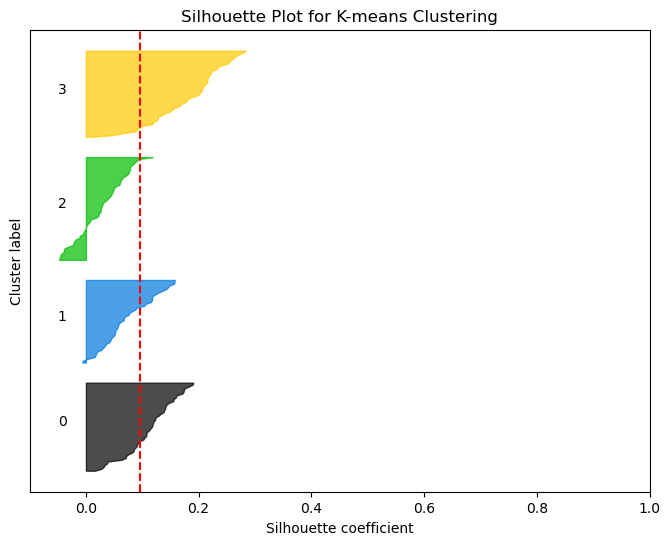

In [66]:
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot for K-means Clustering')
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

## Part 2: Hierarchical Agglomerative Clustering

### 3.0 Clustering

In [44]:
X = df.drop(columns=['Index', 'Category'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward') # initialize HAC
agg_clustering.fit(X) # perform HAC

AgglomerativeClustering(n_clusters=4)

### 4.0 Result Evaluation

### 4.1 Evaluation by sight

In [45]:
cluster_labels = agg_clustering.labels_

In [46]:
cluster_labels # display clsutered label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 3, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2,
       1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3,
       3, 1], dtype=int64)

In [47]:
ground_truth # display ground truth

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [48]:
new_cluster_labels = category_modification_by_sight(cluster_labels, [0, 3, 1, 2])
new_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       2, 3], dtype=int64)

In [49]:
ground_truth 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [50]:
accuracy = custom_accuracy_scores(new_cluster_labels, ground_truth)
print(accuracy)

0.725


### 4.2 Evaluation by scipy module

In [51]:
contingency_matrix = pd.crosstab(df['Category'], cluster_labels)
row_idx, col_idx = linear_sum_assignment(-contingency_matrix.values)

mapped_labels = np.zeros_like(cluster_labels)
for i, col in enumerate(col_idx):
    mapped_labels[cluster_labels == col] = row_idx[i]

In [52]:
accuracy = accuracy_score(df['Category'], mapped_labels)
print("Accuracy:", accuracy) # final accuracy equivalaent to "category_modification_by_sight"

Accuracy: 0.725


### 4.3 Silhouette Score

In [53]:
ground_truth_2d = ground_truth.reshape(-1, 1)  # Reshape ground_truth to have one feature per sample
silhouette_score_value = silhouette_score(ground_truth_2d, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.31222958144663876


### 4.4 Davies Bouldin Score

In [54]:
davies_bouldin_score_value = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_score_value)

Davies-Bouldin Index: 2.6172218661785127


### 4.5 Adjusted Rand Index (ARI)

In [55]:
ari = adjusted_rand_score(ground_truth, cluster_labels)
print("ARI:", ari)

ARI: 0.4994592852899419


### 4.6 Normalized Mutual Information (NMI)

In [56]:
nmi = normalized_mutual_info_score(ground_truth, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi}")

Normalized Mutual Information (NMI): 0.5478505009163762


### 4.7 Cluster Purity

In [57]:
purity = cluster_purity(ground_truth, cluster_labels)
print(f"Cluster Purity: {purity:.2f}")

Cluster Purity: 0.72


### 5.0 Silhouette Plot

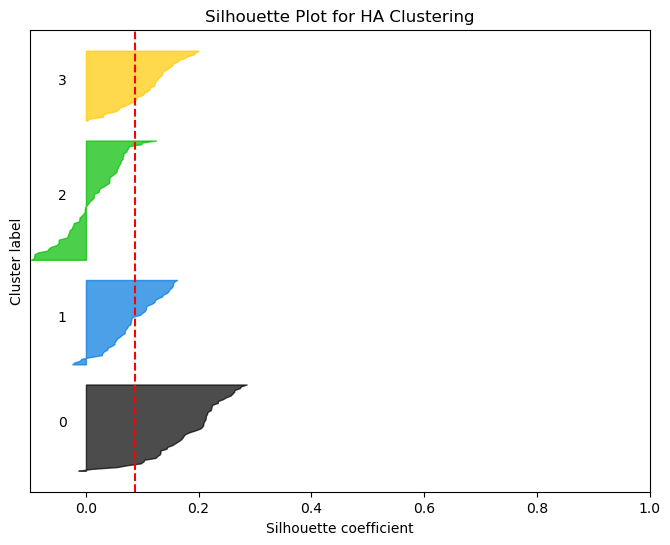

In [61]:
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot for HA Clustering')
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

### 6.0 Principal Component Analysis (PCA)

In [64]:
X = df.drop(columns=['Index', 'Category'])
pca = PCA(n_components=10)  # Reduce to 2 principal components
data_pca = pca.fit_transform(X) # PCA

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward') # initialize HAC
agg_clustering.fit(data_pca) # perform HAC

cluster_labels = agg_clustering.labels_

contingency_matrix = pd.crosstab(df['Category'], cluster_labels)
row_idx, col_idx = linear_sum_assignment(-contingency_matrix.values)

mapped_labels = np.zeros_like(cluster_labels)
for i, col in enumerate(col_idx):
    mapped_labels[cluster_labels == col] = row_idx[i]
    
accuracy = accuracy_score(df['Category'], mapped_labels)
print("Accuracy:", accuracy) # final accuracy equivalaent to "category_modification_by_sight"

ground_truth_2d = ground_truth.reshape(-1, 1)  # Reshape ground_truth to have one feature per sample
silhouette_score_value = silhouette_score(ground_truth_2d, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

davies_bouldin_score_value = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_score_value)

ari = adjusted_rand_score(ground_truth, cluster_labels)
print("ARI:", ari)

nmi = normalized_mutual_info_score(ground_truth, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi}")

purity = cluster_purity(ground_truth, cluster_labels)
print(f"Cluster Purity: {purity:.2f}")

Accuracy: 0.725
Silhouette Score: 0.32335121045077675
Davies-Bouldin Index: 2.80665917450031
ARI: 0.49737648505154675
Normalized Mutual Information (NMI): 0.5423444236195095
Cluster Purity: 0.72


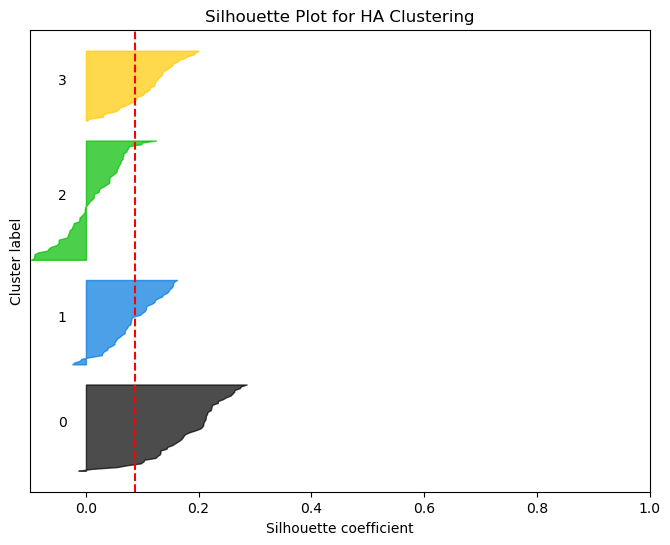

In [62]:
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot for HA Clustering')
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

## 8.0 UML_1 Summary: